How well do jobs and skills pay for Data Analysts?

Methology
- Evaluate median salary for top 6 data jobs
- Find median salary per skill for Data Analysts
- Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\prash\anaconda3\envs\python_course_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# filter for the job titles and country
df_ind = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [6]:
job_titles = df_ind['job_title_short'].value_counts().index[:6].to_list()

In [18]:
# filter the df for the top 6 job titles
df_ind_top6 = df_ind[df_ind['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_ind_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'],
      dtype='object', name='job_title_short')

Plot Salary Distributions

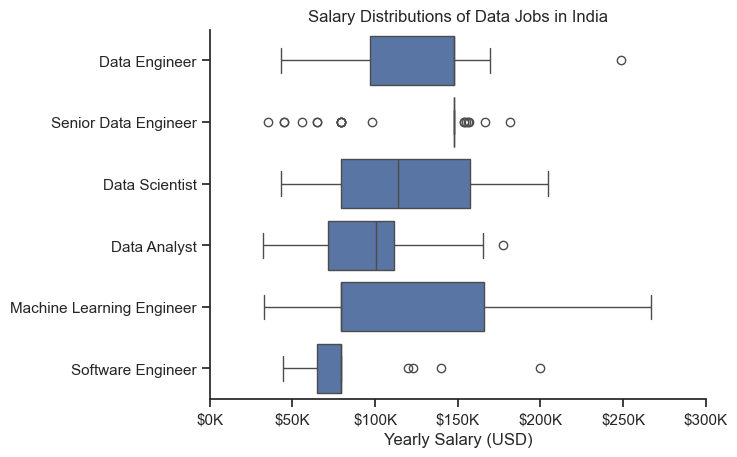

In [17]:
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()